# **Анализ изменения уровня моря**

Исследование данных об уровне моря за несколько десятилетий, по ним построить
модель изменения уровня моря.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from scipy import stats
import statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import mean_squared_error

Чтение файла

In [3]:
tabl = '/content/drive/MyDrive/analiz_data_5_term/kursovaya.xlsx'
data = pd.read_excel(tabl, sheet_name='full_dataset')
data.head()

,Year,Fraction of year,"GMSL (GIA not applied), mm","Standard deviation of GMSL (GIA not applied), mm","GMSL (GIA applied), mm","Standard deviation of GMSL (GIA applied), mm"
0,1993,11526,-37.91,89.01,-37.90,89.01
1,1993,38692,-40.95,89.95,-40.94,89.95
2,1993,65858,-41.09,86.90,-41.07,86.90
3,1993,93025,-43.38,88.73,-43.36,88.73
4,1993,120191,-38.66,89.87,-38.63,89.87


In [4]:
data2 = pd.read_excel(tabl, sheet_name='mean_dataset')

Проверка на NULL значения

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 6 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              1164 non-null   int64  
 1   Fraction of year                                  1164 non-null   int64  
 2   GMSL (GIA not applied), mm                        1164 non-null   float64
 3   Standard deviation of GMSL (GIA not applied), mm  1164 non-null   float64
 4   GMSL (GIA applied), mm                            1164 non-null   float64
 5   Standard deviation of GMSL (GIA applied), mm      1164 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 54.7 KB


In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              32 non-null     int64  
 1   GMSL (GIA not applied), mm                        32 non-null     float64
 2   Standard deviation of GMSL (GIA not applied), mm  32 non-null     float64
 3   GMSL (GIA applied), mm                            32 non-null     float64
 4   Standard deviation of GMSL (GIA applied), mm      32 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.4 KB


Визуализация данных

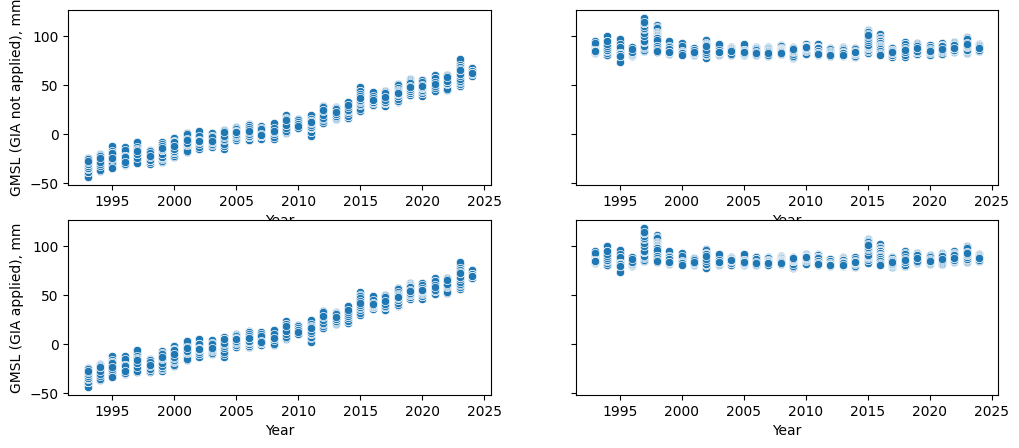

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 5), sharey=True)

sns.scatterplot(x=data['Year'], y=data['GMSL (GIA not applied), mm'], ax = axes[0][0])
sns.scatterplot(x=data['Year'], y=data['Standard deviation of GMSL (GIA not applied), mm'], ax = axes[0][1])
sns.scatterplot(x=data['Year'], y=data['GMSL (GIA applied), mm'], ax = axes[1][0])
sns.scatterplot(x=data['Year'], y=data['Standard deviation of GMSL (GIA applied), mm'], ax = axes[1][1])
plt.show()

Визуализация данных (оранжевые это средние значения)

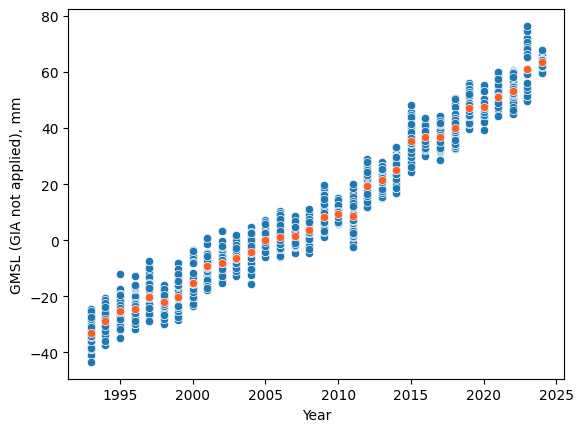

In [ ]:
sns.scatterplot(x=data['Year'], y=data['GMSL (GIA not applied), mm'])
sns.scatterplot(x=data2['Year'], y=data2['GMSL (GIA not applied), mm'],color = '#FE5e26')
plt.show()

<Axes: xlabel='Year', ylabel='GMSL (GIA not applied), mm'>

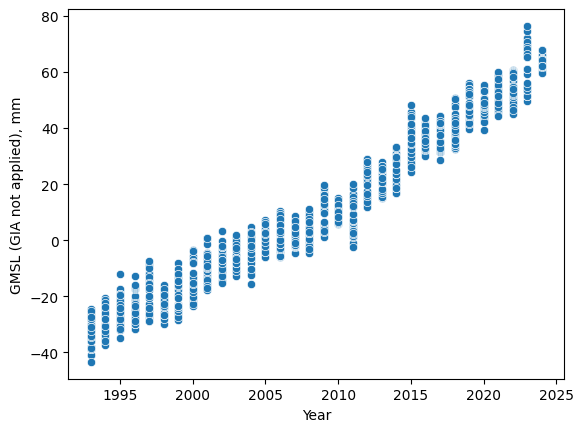

In [ ]:
sns.scatterplot(data=data, x='Year', y='GMSL (GIA not applied), mm')

**Гипотеза: данные распределены линейно.**

Для проверки построим модель линейной регрессии и оценим ее.

**Постороение линейной регрессии с помощью sklearn.linear_model**

GMSL = a * Year + b

In [ ]:
linearRegression = LinearRegression()
result = linearRegression.fit(data['Year'].values.reshape(-1, 1), y=data['GMSL (GIA not applied), mm'].values)
result.coef_, result.intercept_

(array([3.04438257]), -6103.63131425285)

a = 3.04438257

b = -6103.63131425285

**Визуализация полученного результата**

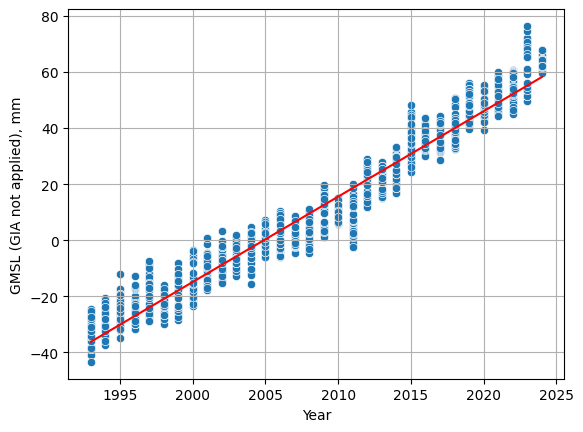

In [ ]:
sns.scatterplot(data=data, x='Year', y='GMSL (GIA not applied), mm')
X=np.linspace(1993,2024)
Y=3.04438257*X - 6103.63131425285
plt.plot(X,Y, color='red')
plt.grid()
plt.show()

**Аптечная модель линейной регресии**

theta= 1997.8612714776632


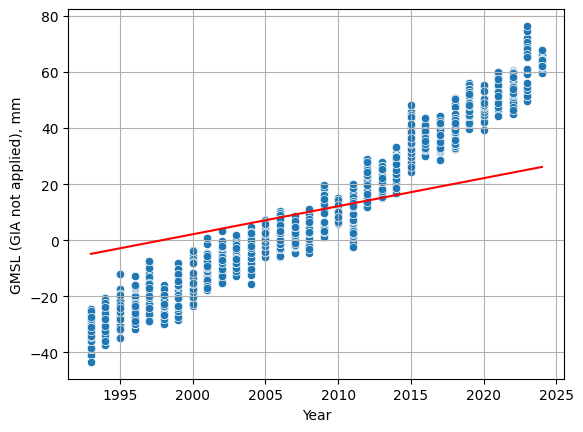

In [8]:
####### Аптечная модель
arr=data.to_numpy()
theta=np.mean(arr[:,0])-np.mean(arr[:,2])
y_hat=arr[:,0].copy()
y_hat-=theta

print('theta=',theta)

ax=sns.scatterplot(data=data, x="Year", y="GMSL (GIA not applied), mm")
plt.plot(arr[:,0],y_hat,c='red')
ax.grid()
plt.show()

**Эмпирический тест Колмогорова-Смирнова** для проверки, насколько хорошо аптечная модель соответствует данным.

Эмпирический мост для аптечной модели
J_n= 1.392194217395248
p_value= 0.04144984240610945


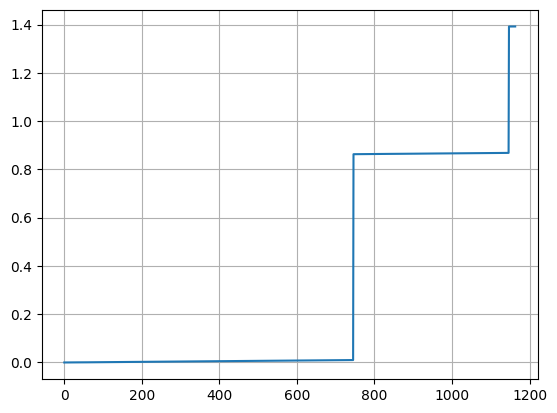

In [ ]:
print('Эмпирический мост для аптечной модели')

regr_res=arr[:,1]-y_hat
sum_regr_res=np.cumsum(regr_res)
emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/np.std(regr_res)
J=np.max(np.abs(emp_bridge))
p_value=stats.kstwobign.sf(J)

print('J_n=',J)
print('p_value=',p_value)
plt.plot(emp_bridge)
plt.grid()
plt.show()

* Если p-value < 0.05, модель плохо описывает данные.

* Если p-value > 0.05, отклонения можно считать случайными.

Для аптечной модели линейной регрессии p-value = 0.04, что меньше 0.05. Следовательно, модель плохо описывает данные.

Построим **простую регрессию**

In [10]:
print('Простая регрессия')

X=arr[:,0]
Y=arr[:,2]
X1 = sm.add_constant(X)
model = sm.OLS(Y, X1)
results = model.fit()

print(results.summary())

Простая регрессия
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 2.320e+04
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        17:58:10   Log-Likelihood:                -3780.2
No. Observations:                1164   AIC:                             7564.
Df Residuals:                    1162   BIC:                             7575.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6103.6313     40.145  

Создана модель простой регрессии - метода наименьших квадратов. И выведена подробная статистика по ней.

Отобразим линию регрессию и доверительнеы интервалы на данных.

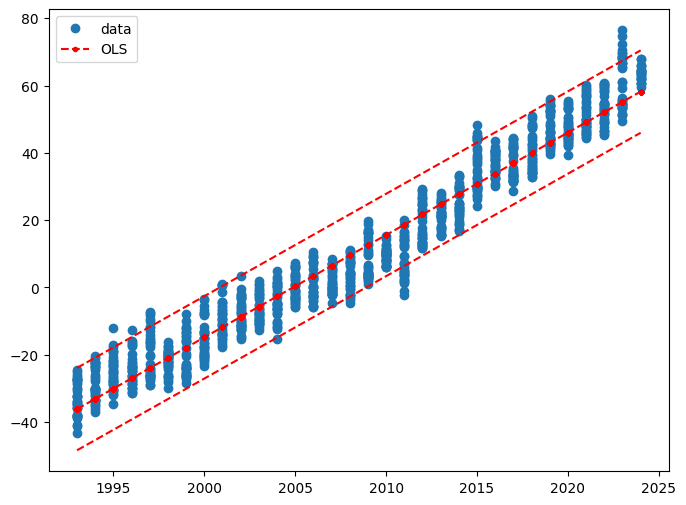

In [ ]:
res=sm.OLS(Y, X1).fit()
pred_ols = res.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, Y, "o", label="data")
ax.plot(X, res.fittedvalues, "r--.", label="OLS")
ax.plot(X, iv_u, "r--")
ax.plot(X, iv_l, "r--")
ax.legend(loc="best")
plt.show()

Не сильно большое количество точек выходит за доверительные интервалы. Следовательно, модель простой регрессии достаточно хорошо описывает данные. Для дополнительной проверки построим эмпирический мост.

**Эмпирический мост для простой регрессии**

Эмпирический мост для простой регрессии
J_n= 4.6192954316865285
upper_p_value= 5.8502440425376335e-19


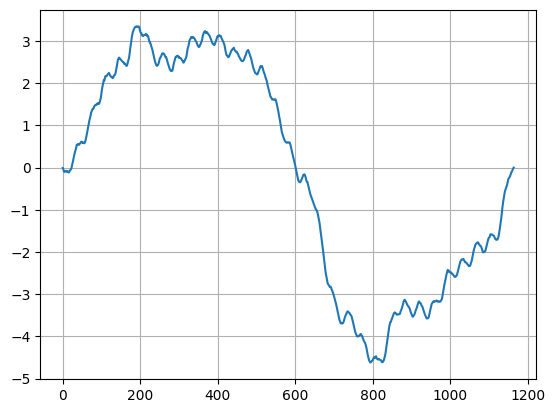

In [ ]:
print('Эмпирический мост для простой регрессии')

simple_regr_res=Y-res.fittedvalues
sum_regr_res=np.cumsum(simple_regr_res)
sigma=np.std(simple_regr_res)
emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/sigma
J=np.max(np.abs(emp_bridge))
p_value=stats.kstwobign.sf(J)

print('J_n=',J)
print('upper_p_value=',p_value)
plt.plot(emp_bridge)
plt.grid()
plt.show()

upper_p_value больше 0.05, следовательно, модель адекватна, отклонения случайны.

Выполним расчёт эмпирического p-value для теста Колмогорова-Смирнова с использованием метода Монте-Карло. Он проверяет, насколько наблюдаемая статистика J (максимальное отклонение эмпирического моста) соответствует нулевой гипотезе о том, что модель корректна.

In [ ]:
simple_regr_res=Y-res.fittedvalues
sum_regr_res=np.cumsum(simple_regr_res)
sigma=np.std(simple_regr_res)
emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/sigma
J=np.max(np.abs(emp_bridge))
p_value=stats.kstwobign.sf(J)

n_iter = 20000
n = len(X)
counter=0

for i in range(n_iter):
    Y_temp =stats.norm.rvs(0,1,n)*sigma+X
    res=sm.OLS(Y_temp, X1).fit()
    simple_regr_res=Y_temp-res.fittedvalues
    sum_regr_res=np.cumsum(simple_regr_res)
    emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/np.std(simple_regr_res)
    J_temp=np.max(np.abs(emp_bridge))
    if J_temp>J:
        counter+=1

print('Эмпирическое пи-значение =',counter/n_iter)

Эмпирическое пи-значение = 0.0


Так как эмпирическое пи-значение = 0.0, то нулевая гипотеза отвергается.

Построим **модель регрессии на Х^2**

Регрессия на X^2


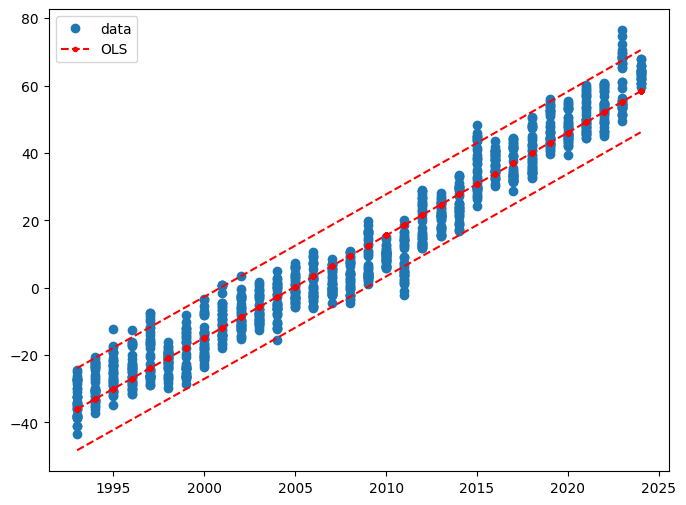

Parameters:  [-3.04725068e+03  7.58092176e-04]
R2:  0.9526788495051678


In [11]:
print('Регрессия на X^2')
X2=np.power(X,2)

X2_1 = sm.add_constant(X2)
results=sm.OLS(Y, X2_1).fit()
pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, Y, "o", label="data")
ax.plot(X, results.fittedvalues, "r--.", label="OLS")
ax.plot(X, iv_u, "r--")
ax.plot(X, iv_l, "r--")
ax.legend(loc="best")
plt.show()

print("Parameters: ", results.params)
print("R2: ", results.rsquared)

J_n= 4.571659633095958
upper_p_value= 1.4042947966605378e-18


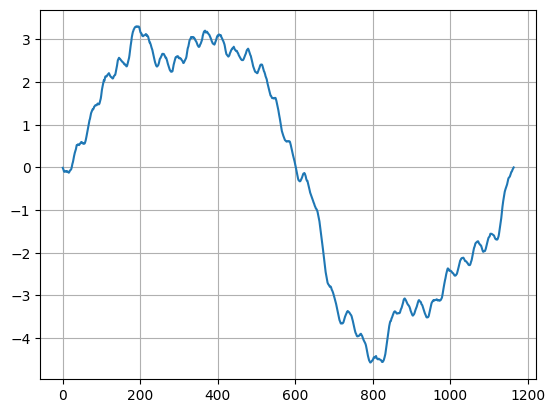

In [12]:
simple_regr_res=Y-results.fittedvalues
sum_regr_res=np.cumsum(simple_regr_res)
sigma=np.std(simple_regr_res)
emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/sigma
J=np.max(np.abs(emp_bridge))
p_value=stats.kstwobign.sf(J)

print('J_n=',J)
print('upper_p_value=',p_value)
plt.plot(emp_bridge)
plt.grid()
plt.show()

Выполним проверку с поомщью метода Монте-Карло.

In [13]:
# стохастическое моделирование
n_iter=20000
n=len(X)
counter=0

for i in range(n_iter):
  Y_temp=stats.norm.rvs(0,1,n)*sigma+X
  res=sm.OLS(Y_temp, X1).fit()
  simple_regr_res=Y_temp-res.fittedvalues
  sum_regr_res=np.cumsum(simple_regr_res)
  emp_bridge=sum_regr_res/len(sum_regr_res)**0.5/np.std(simple_regr_res)
  J_temp=np.max(np.abs(emp_bridge))

  if J_temp>J:
    counter+=1

print('Эмпирическое пи-значение =',counter/n_iter)

Эмпирическое пи-значение = 0.0


Эмпирическое значение меньше 0.05, следовательно, модель неадекватна.

Построим **модель линейной регрессии на X^3**

Регрессия на X^3


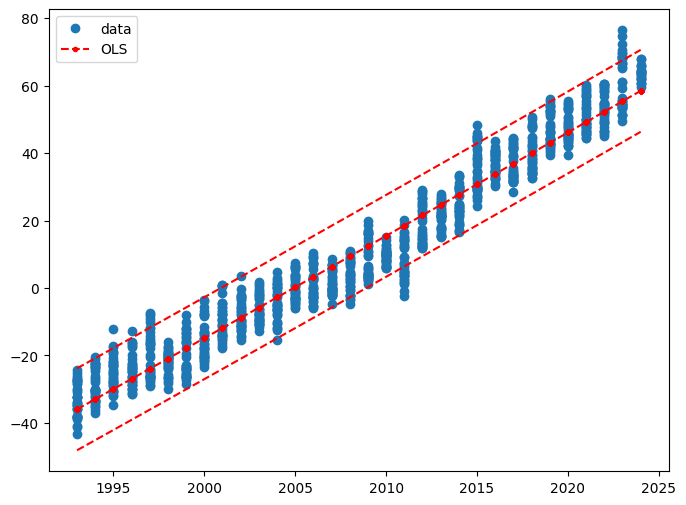

Parameters:  [-2.02845723e+03  2.51694977e-07]
R3:  0.9530563362612063


In [14]:
print('Регрессия на X^3')
X3=np.power(X,3)

X3_1 = sm.add_constant(X3)
results=sm.OLS(Y, X3_1).fit()
pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, Y, "o", label="data")
ax.plot(X, results.fittedvalues, "r--.", label="OLS")
ax.plot(X, iv_u, "r--")
ax.plot(X, iv_l, "r--")
ax.legend(loc="best")
plt.show()

print("Parameters: ", results.params)
print("R3: ", results.rsquared)

Построим **логарифмическую модель**


Логарифмическая модель
[7.59739632 7.59739632 7.59739632 ... 7.61283103 7.61283103 7.61283103]
[       nan        nan        nan ... 4.12600471 4.12713439 4.12842388]


<ipython-input-27-686702989c96>:4: RuntimeWarning: invalid value encountered in log
  LY=np.log(Y)


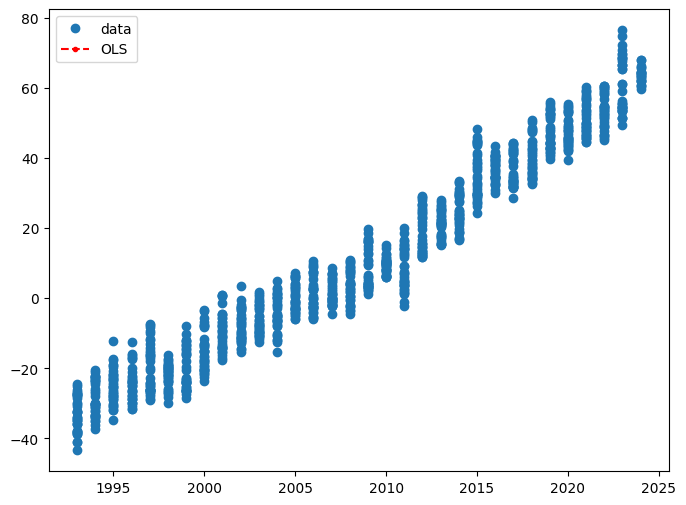

Parameters:  [nan nan]
R2:  nan


In [ ]:
print("Логарифмическая модель")

LX=np.log(X)
LY=np.log(Y)
print(LX)
print(LY)

LX1 = sm.add_constant(LX)
results=sm.OLS(LY, LX1).fit()
pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(X, Y, "o", label="data")
ax.plot(X, np.exp(results.fittedvalues), "r--.", label="OLS")
ax.plot(X, np.exp(iv_u), "r--")
ax.plot(X, np.exp(iv_l), "r--")
ax.legend(loc="best")
plt.show()

print("Parameters: ", results.params)
print("R2: ", results.rsquared)


Логарифмическая модель не подхоит, тк есть отрицательные значения GMSL (уровня моря)

Построим **множественную линейную регрессию.**

In [15]:
strength = data['Year'].to_numpy(dtype = float)
X1 = sm.add_constant(data['GMSL (GIA not applied), mm'].to_numpy(dtype = float))
X2 = np.column_stack((X1, data['GMSL (GIA applied), mm'].to_numpy(dtype = float)))

model = sm.OLS(strength, X2)
res = model.fit()
print(res.summary())
print('Коэффициент детерминации', res.rsquared)
print('Коэффициенты с их оценкой пи-значений:')
names = ['Константа', 'GMSL (GIA not applied), mm', 'GMSL (GIA applied), mm']

for i in range(len(res.params)):
    print(f"{names[i]}: {res.params[i]} (p-значение: {res.pvalues[i]})")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.355e+05
Date:                Mon, 09 Jun 2025   Prob (F-statistic):               0.00
Time:                        19:29:27   Log-Likelihood:                -252.80
No. Observations:                1164   AIC:                             511.6
Df Residuals:                    1161   BIC:                             526.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1991.8553      0.060   3.33e+04      0.0

Так коэффициент детерминации равен 0.999 очень близок к 1, это значит, что модель очень хорошо объясняет данные. Значение p-value каждого параметра меньше 0.05, это означает, что все коэффициенты значимы.

In [17]:
residuals = res.resid
sample_variance = np.var(residuals, ddof = 1)
print(f"Выборочная дисперсия остатков: {sample_variance}")

Выборочная дисперсия остатков: 0.09047755481975552


Выборочная дисперсия остатков достаточно мала, это значит, что модель точная.

*Визуализация остатков*

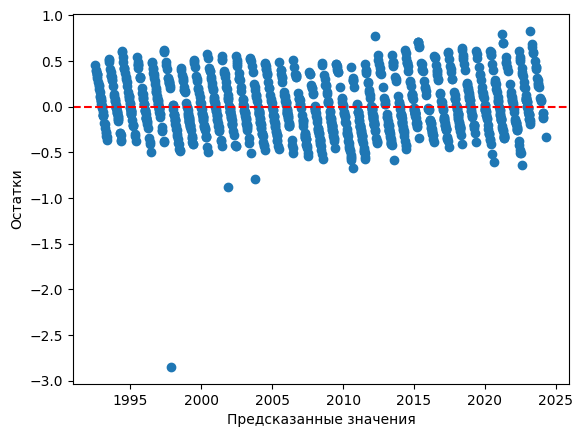

In [18]:
plt.scatter(res.fittedvalues, residuals)
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

*Проверка остатков на нормальность*

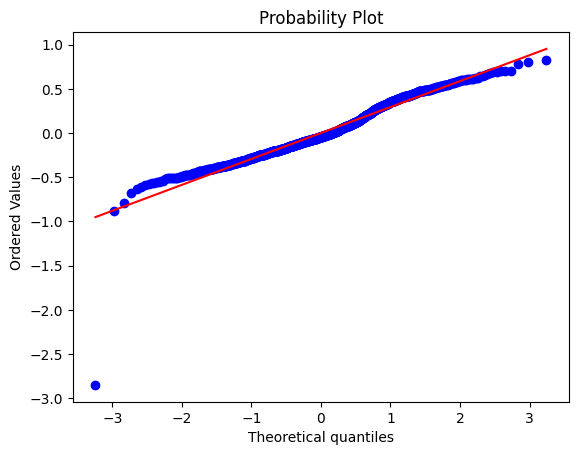

In [19]:
stats.probplot(residuals, plot=plt)
plt.show()

**Кроссвалидация**

Выполним кросс-валидацию множественной линейной регрессии с вычислением средней квадратичной ошибки (MSE) и её сравнением с дисперсией остатков.

In [ ]:
mse_list = []
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X2, strength, test_size=0.2)
    X_train_df = pd.DataFrame(X_train, columns = ['Константа', 'GMSL (GIA not applied), mm', 'GMSL (GIA applied), mm'])
    X_test_df = pd.DataFrame(X_test, columns = ['Константа', 'GMSL (GIA not applied), mm', 'GMSL (GIA applied), mm'])
    model = sm.OLS(y_train, X_train_df)
    model = model.fit()
    y_pred = model.predict(X_test_df)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
mean_mse = np.mean(mse_list)
residuals = model.resid
sample_variance = np.var(residuals, ddof = 1)
print(f"Среднее значение квадрата отклонения: {mean_mse}")
print(f"Выборочная дисперсия остатков: {sample_variance}")
print(f"Отношение MSE к выборочной дисперсии: {mean_mse / sample_variance}")

Среднее значение квадрата отклонения: 0.09170668651741341
Выборочная дисперсия остатков: 0.08218065006335104
Отношение MSE к выборочной дисперсии: 1.115915808000046


Отношение MSE к выборочной дисперсии примерно равно 1, это означает, что модель обобщает так же хорошо, как и обучается